## Importer les librairies

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Charger le dataframe

In [21]:
df = pd.read_csv('../../Data/Cleaned_Dataframe.csv',sep=';')
colonnes_bool = ['ANTECEDENT_FAMILIAUX', 'DIABETE', 'EXPOSITION', 'ACOUPHENES']
for col in colonnes_bool:
    df[col] = df[col].replace({'True': True, 'False': False})
    df[col] = df[col].astype('boolean')  # gère aussi les <NA>
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

C:\Users\thiev\AppData\Local\Temp\ipykernel_9912\2098692892.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../Data/Cleaned_Dataframe.csv',sep=';')


## On ajoute la variable perte qui correspond à la gravité de la perte basé sur le test THR

In [22]:
thr_cols = [col for col in df.columns if col.startswith('FREQ_') and col.endswith('_THR')]
df['mean_thr'] = df[thr_cols].mean(axis=1)
def categoriser_perte(x):
    if x < 20:
        return 'Aucune'
    elif 20 <= x < 40:
        return 'Légère'
    elif 40 <= x < 60:
        return 'Moyenne'
    else:
        return 'Sévère'
df['PERTE'] = df['mean_thr'].apply(categoriser_perte)
df.drop(columns=['mean_thr'], inplace=True)
order_perte = ['Aucune', 'Légère', 'Moyenne', 'Sévère']
df['PERTE'] = pd.Categorical(
    df['PERTE'],
    categories=order_perte,
    ordered=True
)

---
# Statistiques descriptives et graphes d'exploration

## Matrices d'informations sur les features

In [23]:
plt.rcParams['figure.figsize'] = (10, 6)

num_features = ['AGE'] + [c for c in df.columns if c.startswith('FREQ_')]

display(df[num_features].describe().T)
total = df.isna().sum()
percent = 100 * df.isna().mean().round(3)
dtypes = df.dtypes
missing_df = pd.DataFrame({
    'type': dtypes,
    'nb_missing': total,
    'pct_missing': percent
})
display(missing_df)

display(
    df
        .groupby('ACOUPHENES')[num_features]
        .agg(['mean','std','median','count'])
        .round(2)
)

count        mean        std   min   25%    50%    75%  \
AGE              62275.0   70.981630  12.875492   0.0  64.0   72.0   80.0   
FREQ_250_D_THR   62142.0   29.957742  14.743687 -10.0  20.0   25.0   40.0   
FREQ_250_G_THR   62121.0   29.761643  14.787735 -10.0  20.0   25.0   35.0   
FREQ_250_D_UCL   40699.0   94.953193   9.360011  10.0  90.0   95.0  100.0   
FREQ_250_G_UCL   40582.0   95.234488   9.328422  15.0  90.0  100.0  100.0   
FREQ_500_D_THR   62275.0   32.140265  15.399903 -10.0  20.0   30.0   40.0   
FREQ_500_G_THR   62275.0   31.946977  15.550911 -10.0  20.0   30.0   40.0   
FREQ_500_D_UCL   62275.0   97.427957  19.188000   0.0  90.0  100.0  110.0   
FREQ_500_G_UCL   62275.0   97.758956  19.609337   0.0  90.0  100.0  110.0   
FREQ_1000_D_THR  62275.0   36.065660  15.884413  -5.0  25.0   35.0   45.0   
FREQ_1000_G_THR  62275.0   35.592132  16.302145 -10.0  25.0   35.0   45.0   
FREQ_1000_D_UCL  62275.0  100.351168  14.111292   0.0  95.0  100.0  110.0   
FREQ_1000_G_UCL  62275.0  100.637607  14.073215   0.0  95.0  100.0  110.0   
FREQ_2000_D_THR  62275.0   44.676692  17.209211  -5.0  35.0   45.0   55.0   
FREQ_2000_G_THR  62275.0   45.447981  17.600139  -5.0  35.0   45.0   55.0   
FREQ_2000_D_UCL  62275.0  101.003452  14.490734   0.0  95.0  105.0  110.0   
FREQ_2000_G_UCL  62275.0  101.469803  14.733991   0.0  95.0  105.0  110.0   
FREQ_4000_D_THR  62275.0   57.599920  19.081515 -10.0  45.0   60.0   70.0   
FREQ_4000_G_THR  62275.0   58.977246  18.997683 -10.0  50.0   60.0   70.0   
FREQ_4000_D_UCL  62275.0  101.175961  19.436397   0.0  95.0  105.0  110.0   
FREQ_4000_G_UCL  62275.0  101.637800  19.661088   0.0  95.0  105.0  110.0   
FREQ_8000_D_THR  59028.0   66.608643  21.160832 -10.0  55.0   70.0   80.0   
FREQ_8000_G_THR  59096.0   67.452010  20.759942 -10.0  55.0   70.0   80.0   
FREQ_8000_D_UCL  16912.0   96.858444  11.335324   5.0  90.0  100.0  105.0   
FREQ_8000_G_UCL  16883.0   97.258544  11.184754  -5.0  95.0  100.0  105.0   

                   max  
AGE              103.0  
FREQ_250_D_THR   110.0  
FREQ_250_G_THR   110.0  
FREQ_250_D_UCL   120.0  
FREQ_250_G_UCL   120.0  
FREQ_500_D_THR   115.0  
FREQ_500_G_THR   115.0  
FREQ_500_D_UCL   120.0  
FREQ_500_G_UCL   120.0  
FREQ_1000_D_THR  120.0  
FREQ_1000_G_THR  120.0  
FREQ_1000_D_UCL  120.0  
FREQ_1000_G_UCL  125.0  
FREQ_2000_D_THR  120.0  
FREQ_2000_G_THR  120.0  
FREQ_2000_D_UCL  125.0  
FREQ_2000_G_UCL  120.0  
FREQ_4000_D_THR  120.0  
FREQ_4000_G_THR  120.0  
FREQ_4000_D_UCL  125.0  
FREQ_4000_G_UCL  125.0  
FREQ_8000_D_THR  120.0  
FREQ_8000_G_THR  120.0  
FREQ_8000_D_UCL  125.0  
FREQ_8000_G_UCL  125.0

type  nb_missing  pct_missing
ID_CLIENT               object           0          0.0
ANTECEDENT_FAMILIAUX   boolean        2655          4.3
ACOUPHENES             boolean           0          0.0
DIABETE                boolean        2534          4.1
EXPOSITION             boolean        1463          2.3
AGE                    float64           0          0.0
SEXE                    object          19          0.0
FREQ_250_D_THR         float64         133          0.2
FREQ_250_G_THR         float64         154          0.2
FREQ_250_D_UCL         float64       21576         34.6
FREQ_250_G_UCL         float64       21693         34.8
FREQ_500_D_THR         float64           0          0.0
FREQ_500_G_THR         float64           0          0.0
FREQ_500_D_UCL         float64           0          0.0
FREQ_500_G_UCL         float64           0          0.0
FREQ_1000_D_THR        float64           0          0.0
FREQ_1000_G_THR        float64           0          0.0
FREQ_1000_D_UCL        float64           0          0.0
FREQ_1000_G_UCL        float64           0          0.0
FREQ_2000_D_THR        float64           0          0.0
FREQ_2000_G_THR        float64           0          0.0
FREQ_2000_D_UCL        float64           0          0.0
FREQ_2000_G_UCL        float64           0          0.0
FREQ_4000_D_THR        float64           0          0.0
FREQ_4000_G_THR        float64           0          0.0
FREQ_4000_D_UCL        float64           0          0.0
FREQ_4000_G_UCL        float64           0          0.0
FREQ_8000_D_THR        float64        3247          5.2
FREQ_8000_G_THR        float64        3179          5.1
FREQ_8000_D_UCL        float64       45363         72.8
FREQ_8000_G_UCL        float64       45392         72.9
PERTE                 category           0          0.0

AGE                      FREQ_250_D_THR                       \
             mean    std median  count           mean    std median  count   
ACOUPHENES                                                                   
False       72.75  12.66   74.0  33177          30.64  14.61   30.0  33125   
True        68.96  12.82   70.0  29098          29.18  14.85   25.0  29017   

           FREQ_250_G_THR                      FREQ_250_D_UCL               \
                     mean    std median  count           mean   std median   
ACOUPHENES                                                                   
False               30.40  14.65   30.0  33114          95.36  8.98  100.0   
True                29.03  14.91   25.0  29007          94.49  9.76   95.0   

                  FREQ_250_G_UCL                     FREQ_500_D_THR         \
            count           mean   std median  count           mean    std   
ACOUPHENES                                                                   
False       21641          95.64  8.96  100.0  21589          33.00  15.24   
True        19058          94.78  9.71   95.0  18993          31.16  15.53   

                         FREQ_500_G_THR                      FREQ_500_D_UCL  \
           median  count           mean    std median  count           mean   
ACOUPHENES                                                                    
False        30.0  33177          32.77  15.39   30.0  33177          98.13   
True         30.0  29098          31.01  15.68   30.0  29098          96.63   

                                FREQ_500_G_UCL                       \
              std median  count           mean    std median  count   
ACOUPHENES                                                            
False       18.81  100.0  33177          98.46  19.19  100.0  33177   
True        19.58  100.0  29098          96.96  20.04  100.0  29098   

           FREQ_1000_D_THR                      FREQ_1000_G_THR                \
                      mean    std median  count            mean    std median   
ACOUPHENES                                                                      
False                37.13  15.71   35.0  33177           36.65  16.15   35.0   
True                 34.85  16.00   35.0  29098           34.38  16.39   35.0   

                  FREQ_1000_D_UCL                      FREQ_1000_G_UCL         \
            count            mean    std median  count            mean    std   
ACOUPHENES                                                                      
False       33177          101.13  13.72  100.0  33177          101.33  13.84   
True        29098           99.46  14.50  100.0  29098           99.85  14.30   

                         FREQ_2000_D_THR                      FREQ_2000_G_THR  \
           median  count            mean    std median  count            mean   
ACOUPHENES                                                                      
False       105.0  33177           45.76  16.93   45.0  33177           46.46   
True        100.0  29098           43.44  17.44   45.0  29098           44.29   

                                FREQ_2000_D_UCL                       \
              std median  count            mean    std median  count   
ACOUPHENES                                                             
False       17.31   45.0  33177          101.82  14.11  105.0  33177   
True        17.85   45.0  29098          100.07  14.86  100.0  29098   

           FREQ_2000_G_UCL                      FREQ_4000_D_THR                \
                      mean    std median  count            mean    std median   
ACOUPHENES                                                                      
False               102.17  14.46  105.0  33177           58.04  18.99   60.0   
True                100.67  15.00  105.0  29098           57.10  19.17   60.0   

                  FREQ_4000_G_THR                      FREQ_4000_D_UCL         \
            count      

Ces matrices nous donnent des informations à propos du dataframe qui pourront nous être utiles pour des analyses ultérieures

---
## Histogrammes de densité

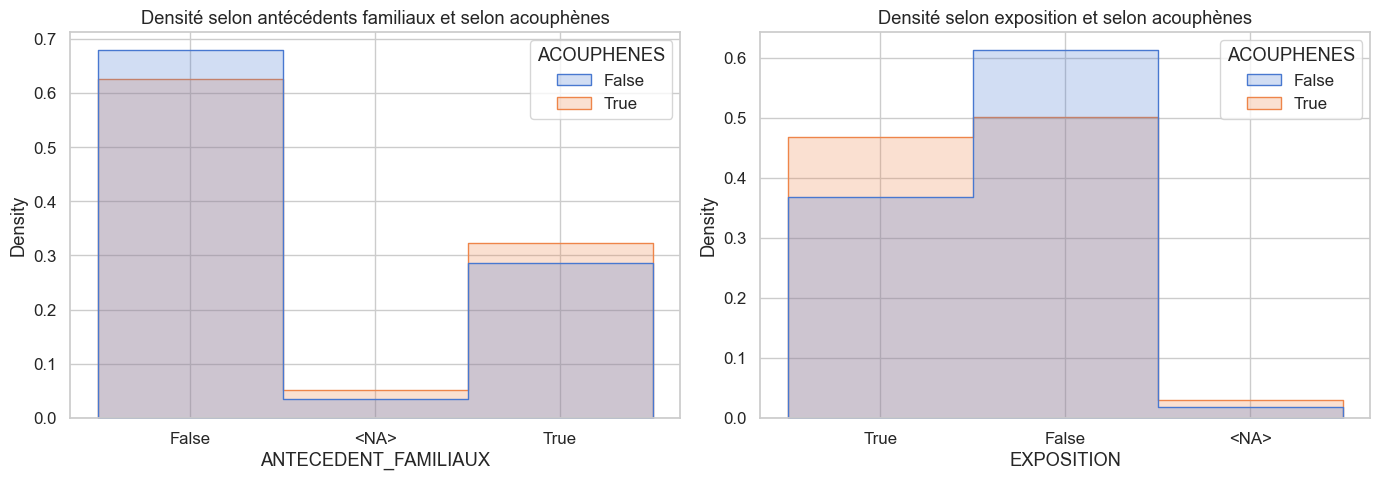

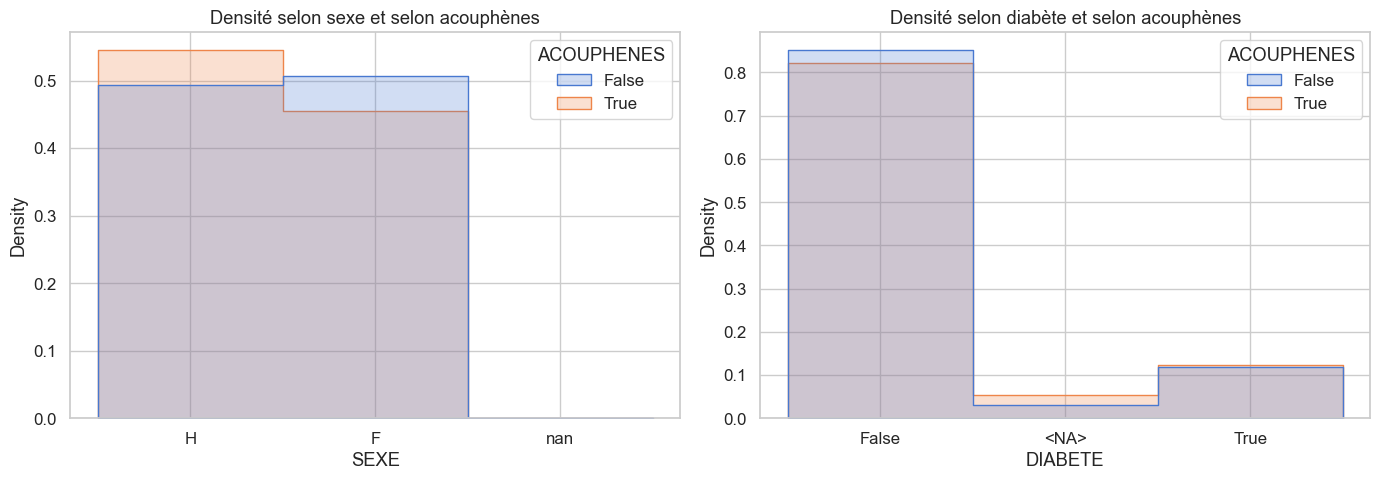

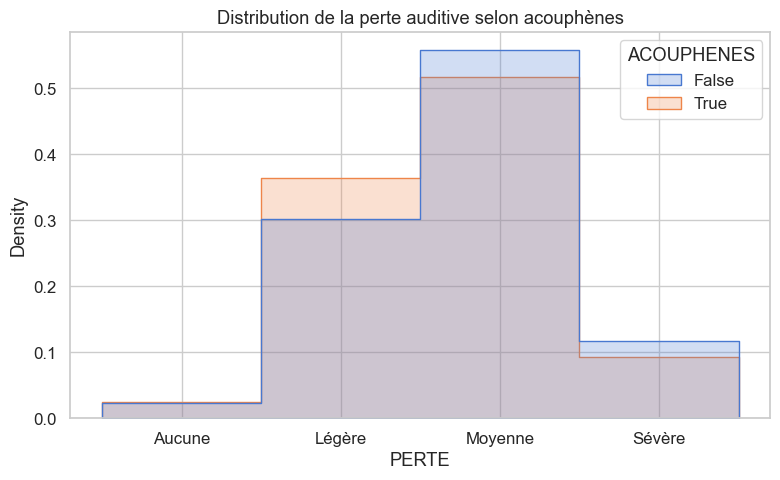

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Antécédents familiaux
sns.histplot(data=df, x=df['ANTECEDENT_FAMILIAUX'].astype(str), hue='ACOUPHENES',
            element='step', stat='density', common_norm=False, ax=axes[0])
axes[0].set_title("Densité selon antécédents familiaux et selon acouphènes")

# Exposition
sns.histplot(data=df, x=df['EXPOSITION'].astype(str), hue='ACOUPHENES',
            element='step', stat='density', common_norm=False, ax=axes[1])
axes[1].set_title("Densité selon exposition et selon acouphènes")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Sexe
sns.histplot(data=df, x=df['SEXE'].astype(str), hue='ACOUPHENES',
            element='step', stat='density', common_norm=False, ax=axes[0])
axes[0].set_title("Densité selon sexe et selon acouphènes")

# Diabete
sns.histplot(data=df, x=df['DIABETE'].astype(str), hue='ACOUPHENES',
            element='step', stat='density', common_norm=False, ax=axes[1])
axes[1].set_title("Densité selon diabète et selon acouphènes")

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))

# Perte auditive
sns.histplot(data=df, x='PERTE', hue='ACOUPHENES',
                element='step', stat='density', common_norm=False, discrete=True, ax=ax
)

ax.set_title("Distribution de la perte auditive selon acouphènes")

plt.tight_layout()
plt.show()

On peut voir avec ces histogrammes la différence pour les variables catégoriques la différence de distribution quand il y a et quand il n'y a pas d'acouphènes. La variable qui semble avoir l'impact le plus significatif ici est l'exposition au bruit où la distribution True et False varie significativement selon si il y a la présence d'un acouphène ou pas.

---
## Boxplots par fréquence

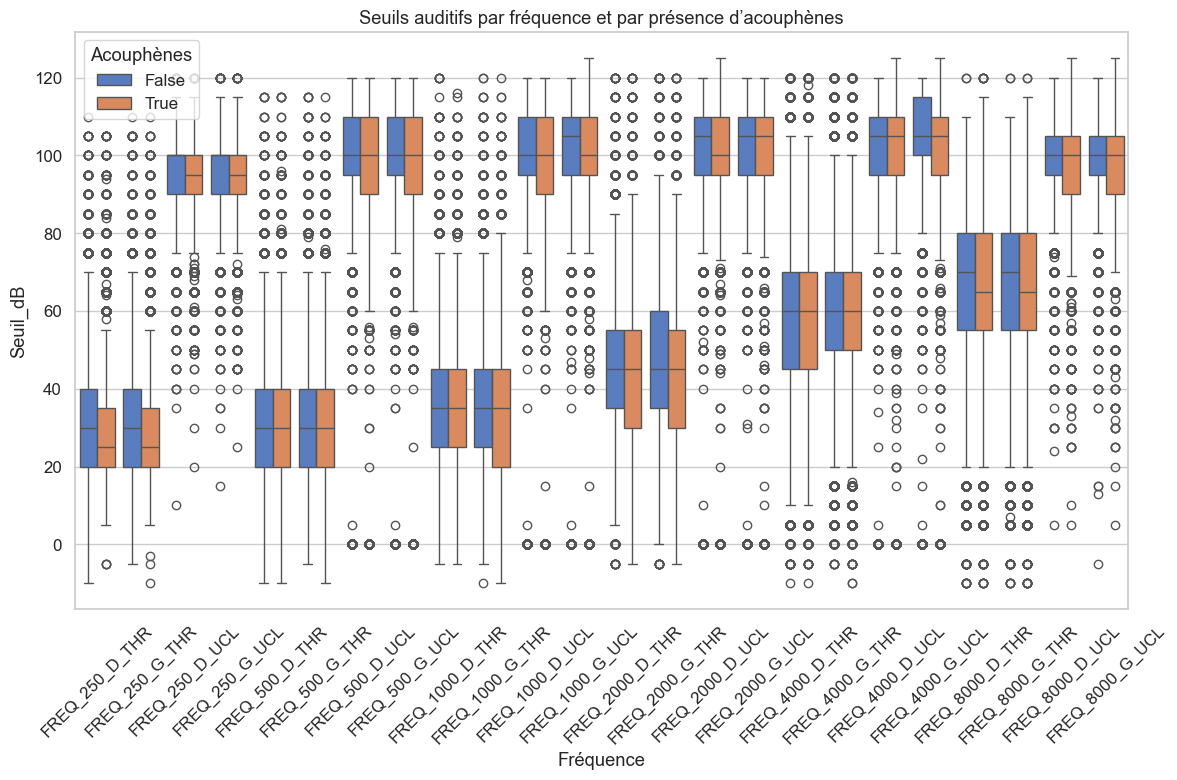

In [25]:
df_long = (
    df
        .loc[:, ['ACOUPHENES'] + [c for c in df.columns if c.startswith('FREQ_')]]
        .melt(id_vars='ACOUPHENES',
            var_name='Fréquence',
            value_name='Seuil_dB')
)

plt.figure(figsize=(12,8))
sns.boxplot(data=df_long, x='Fréquence', y='Seuil_dB', hue='ACOUPHENES')
plt.xticks(rotation=45)
plt.title("Seuils auditifs par fréquence et par présence d’acouphènes")
plt.legend(title="Acouphènes", loc='upper left')
plt.tight_layout()
plt.show()

On peut voir qu'il y a, pour les 2 tests, et pour toutes les valeurs de fréquence une faible différence de distribution des données selon s'il y a la présence d'acouphènes ou pas.

---
## Heatmap des corrélations

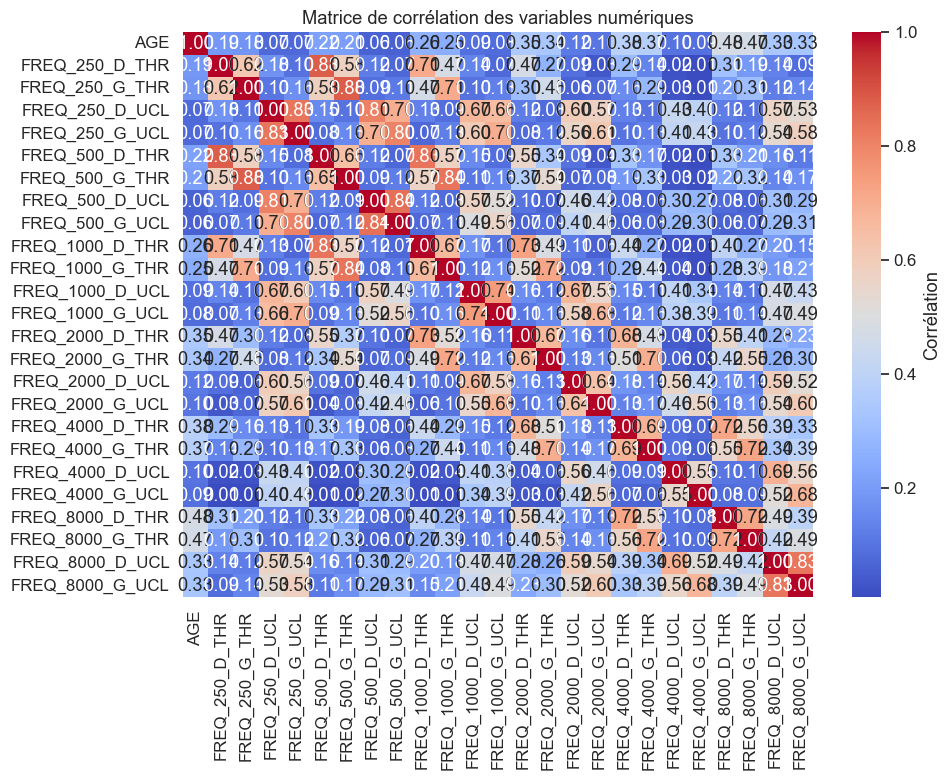

In [26]:
corr = df[num_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Corrélation'})
plt.title("Matrice de corrélation des variables numériques")
plt.tight_layout()
plt.show()

Nous voyons qu'il est difficile de trouver des valeurs de corrélation élevées entre des variables intéréssantes (en particulier les acouphènes)

---
## Pairplot pour toutes les variables

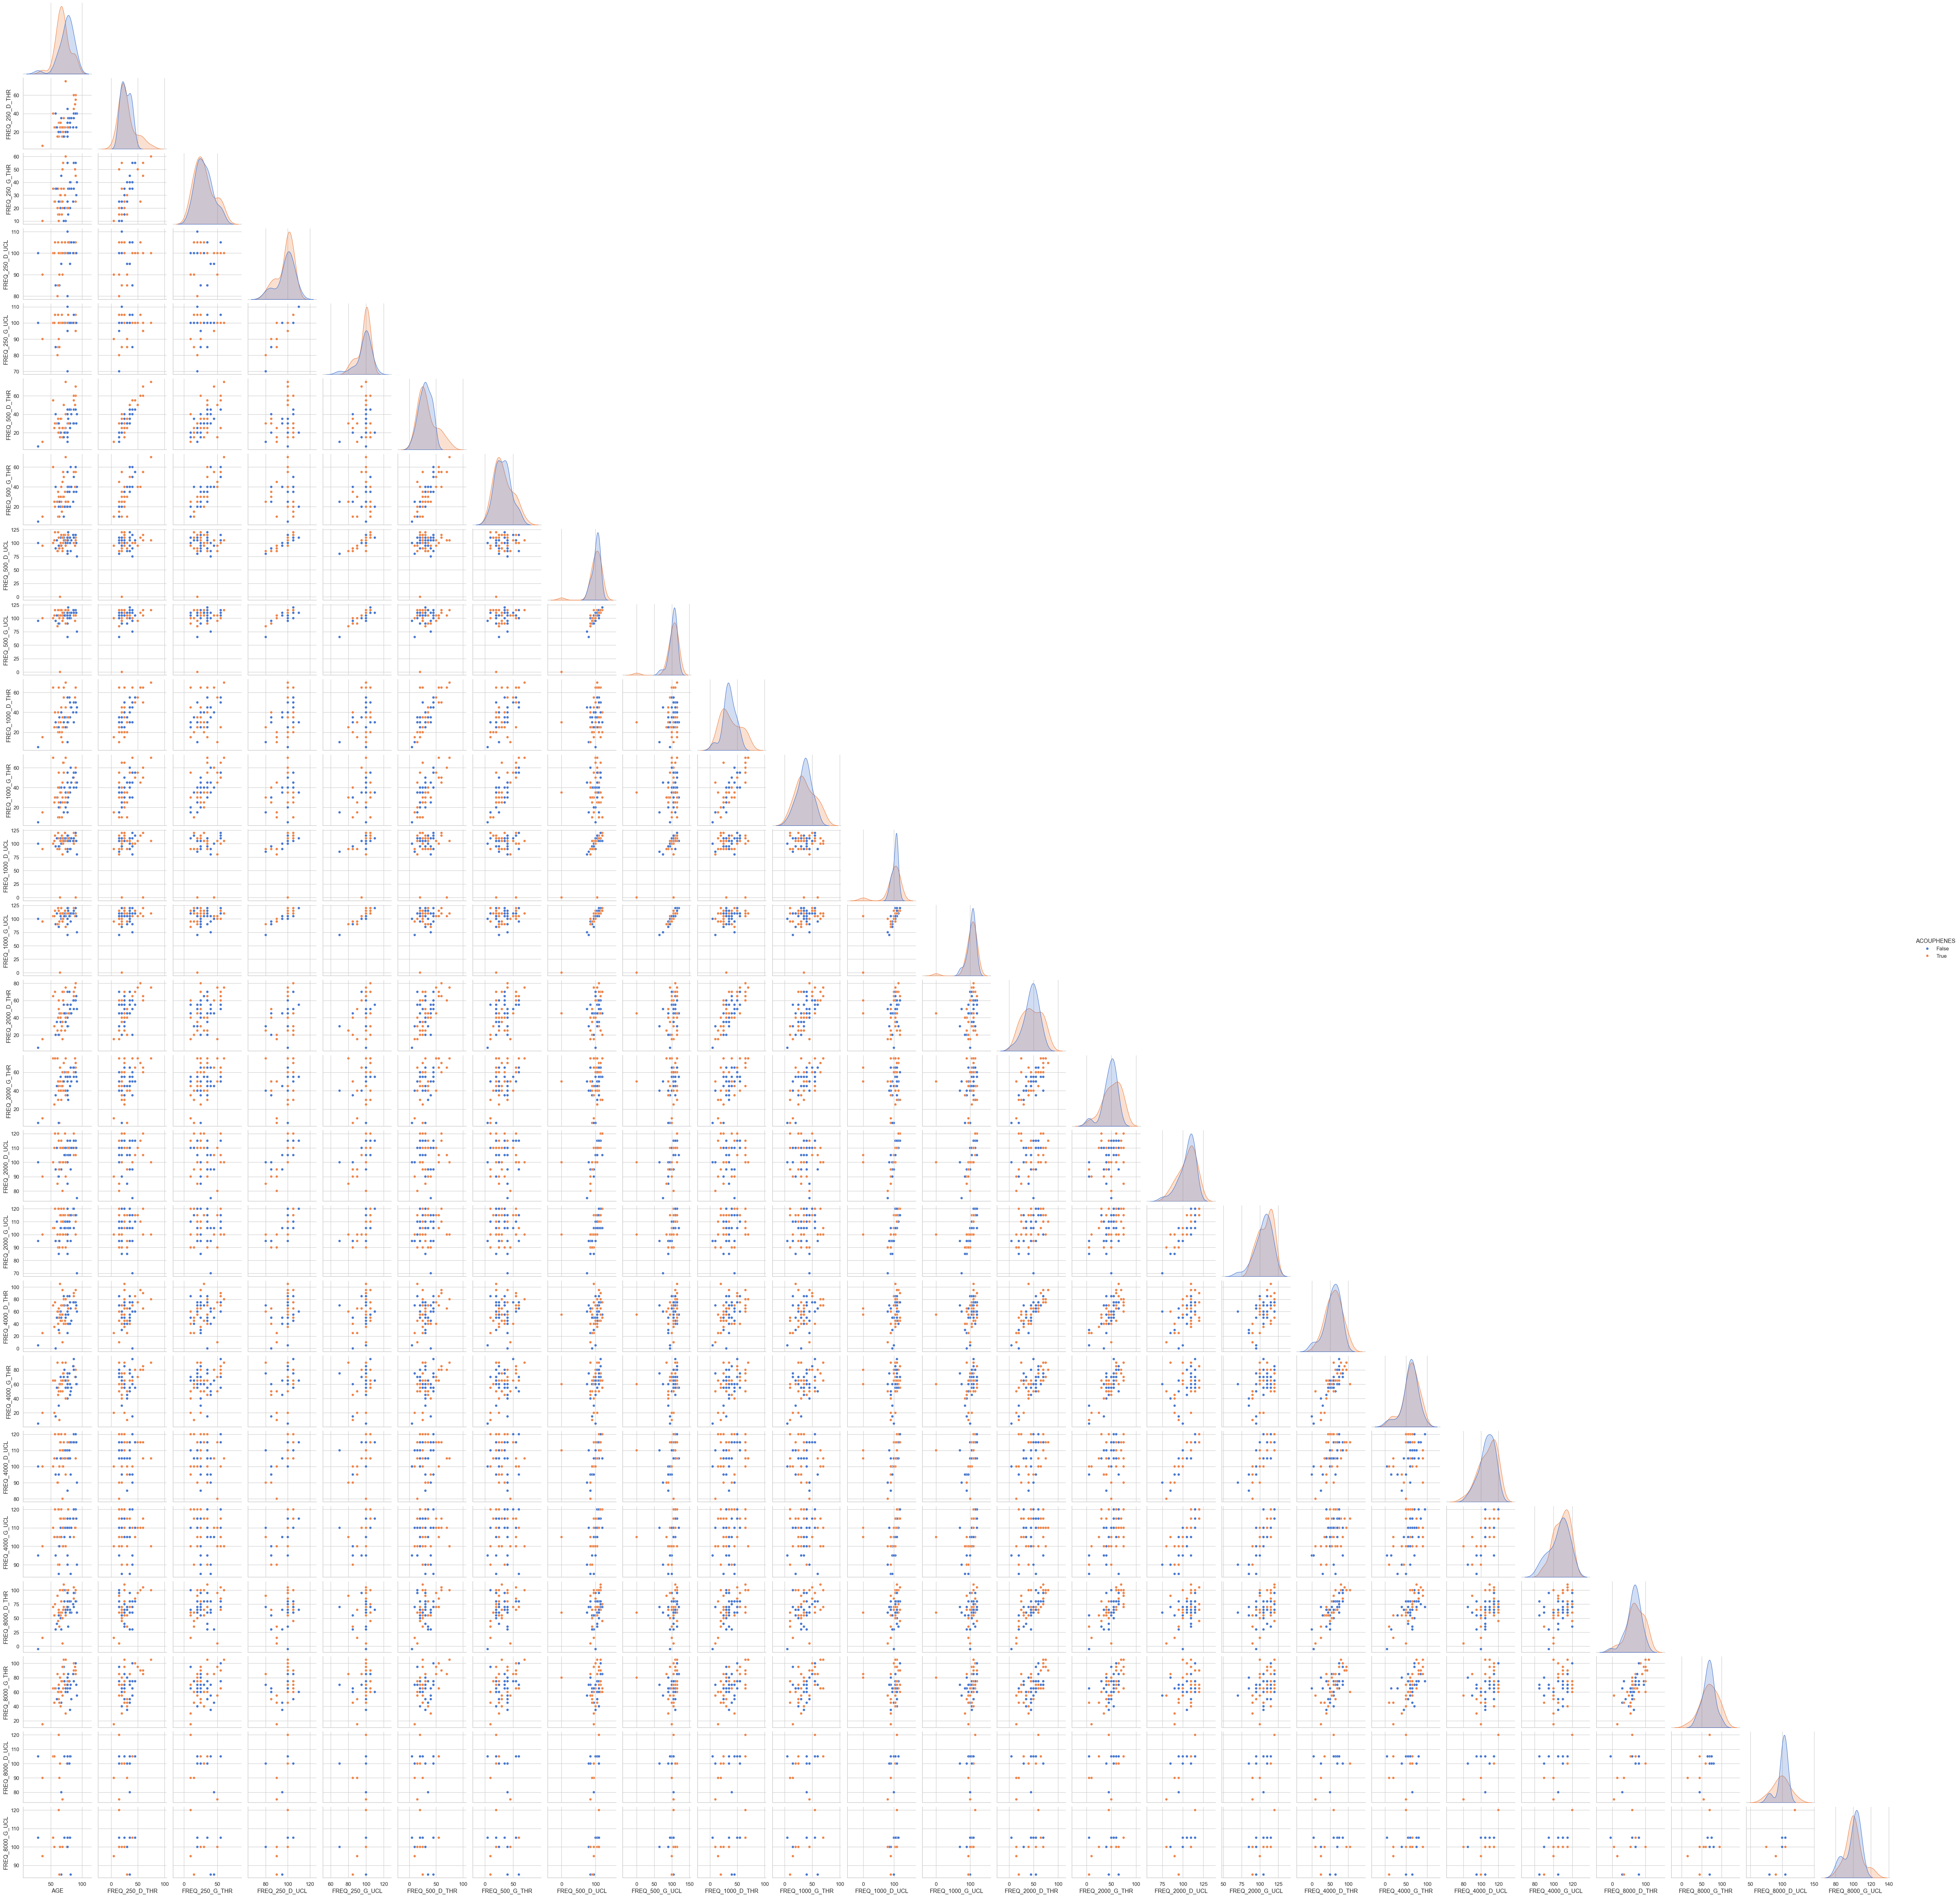

In [27]:
sample_df = df.sample(frac=0.001, random_state=42)
sns.pairplot(sample_df, vars=num_features, hue='ACOUPHENES', diag_kind='kde', corner=True)

Après une exploration de tout les pairplots, difficile d'en sortir des informations pertinentes quant à l'explication des acouphènes

---
## Top 20 des corrélations avec la variable ACOUPHENES

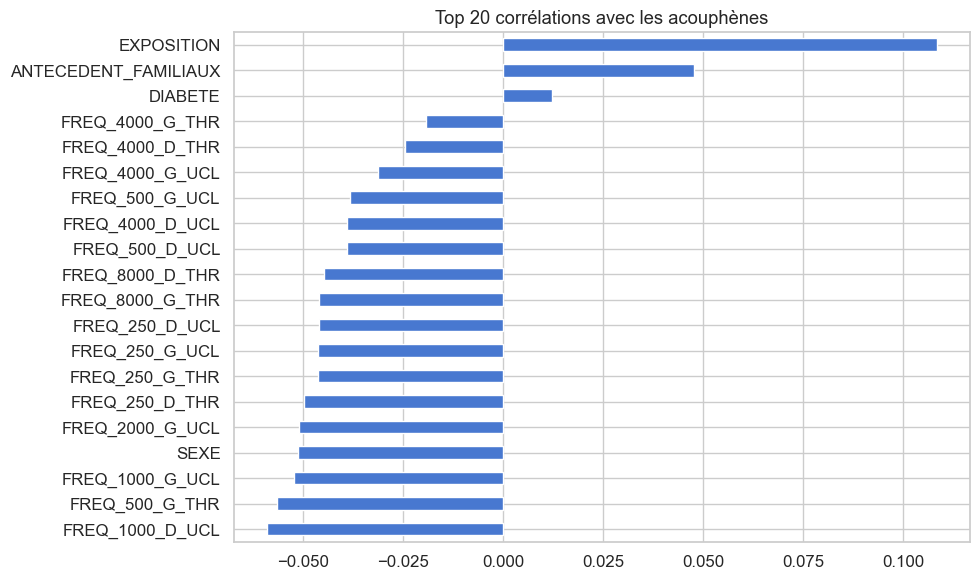

In [28]:
for col in df.select_dtypes(include="object").columns:
    if col != "ID_CLIENT":
        df[col] = df[col].astype(str).factorize()[0]

# Corrélation
cor_matrix = df.corr(numeric_only=True)
corr_with_target = cor_matrix["ACOUPHENES"].drop("ACOUPHENES").sort_values(ascending=False)

# Top 20
top_corr = corr_with_target.head(20)

plt.figure(figsize=(10, 6))
top_corr.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 20 corrélations avec les acouphènes")
plt.tight_layout()
plt.show()

On constate que les variables les plus positivement corrélées aux acouphènes sont les antécédents familiaux et le diabète, bien que les corrélations restent faibles. La majorité des autres variables, notamment les seuils auditifs à différentes fréquences, présentent une légère corrélation négative avec les acouphènes. Le tout reste bien faible malgré tout.

---
## Écart moyen avec vs sans acouphènes

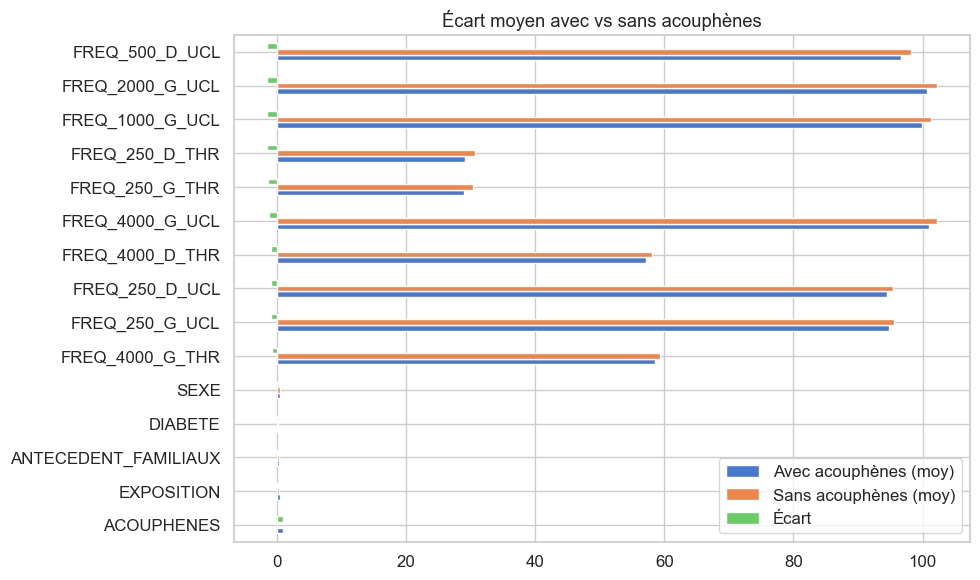

In [29]:
# Séparation des groupes
with_ac = df[df["ACOUPHENES"] == 1]
without_ac = df[df["ACOUPHENES"] == 0]

# Comparaison
summary = pd.DataFrame({
    "Avec acouphènes (moy)": with_ac.mean(numeric_only=True),
    "Sans acouphènes (moy)": without_ac.mean(numeric_only=True),
    "Écart": with_ac.mean(numeric_only=True) - without_ac.mean(numeric_only=True)
}).sort_values("Écart", ascending=False)

# Affichage des top 15
summary.head(15).plot(kind="barh", figsize=(10,6), title="Écart moyen avec vs sans acouphènes")
plt.tight_layout()
plt.show()

Ce code basé sur la moyenne de chaque feature à la différence de Accouphènes ou pas Accouphènes nous permet d'observer que les personnes souffrant d’acouphènes présentent en moyenne des seuils auditifs légèrement plus bas à certaines fréquences par rapport à celles qui n’en ont pas, bien que les écarts restent faibles. Les différences sont principalement observées sur les mesures auditives, tandis que les variables comme le sexe, le diabète ou les antécédents familiaux montrent peu d’écart moyen. Néanmoins on se rend bien compte que l'on ne peut pas en tirer grand chose, même en augmentant les écarts (logarithme etc..) tellement tout est proche.

---
## Corrélation entre âge et seuil auditif

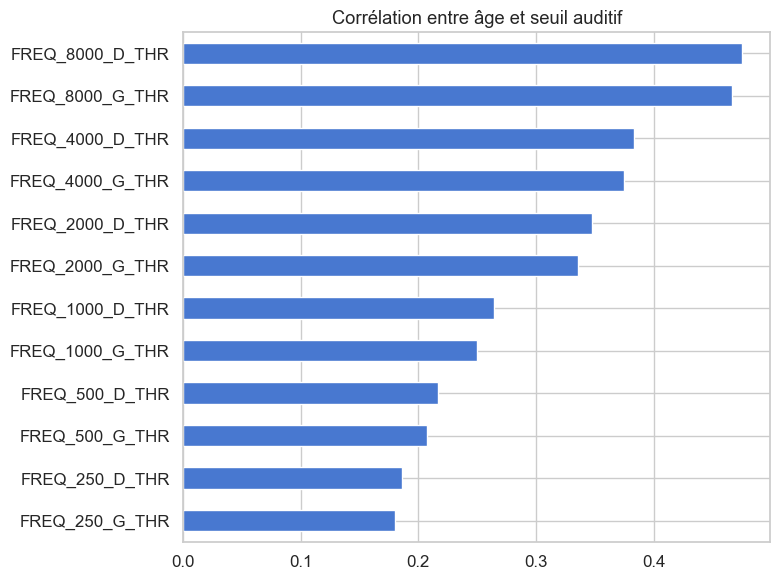

In [30]:
freq_cols = [col for col in df.columns if "_THR" in col and "FREQ" in col]
age_corrs = df[freq_cols + ["AGE"]].corr()["AGE"].drop("AGE").sort_values()
plt.figure(figsize=(8, 6))
age_corrs.plot(kind="barh")
plt.title("Corrélation entre âge et seuil auditif")
plt.tight_layout()
plt.show()

Le graphique montre que l’âge est positivement corrélé aux seuils auditifs, surtout aux hautes fréquences (8000 Hz, 4000 Hz), ce qui suggère une perte auditive liée à l’âge. Le code calcule la corrélation entre l’âge et chaque seuil auditif (variables contenant _THR) et affiche les résultats triés sous forme de barres horizontales.

---
## Asymétrie auditive (droite vs gauche)

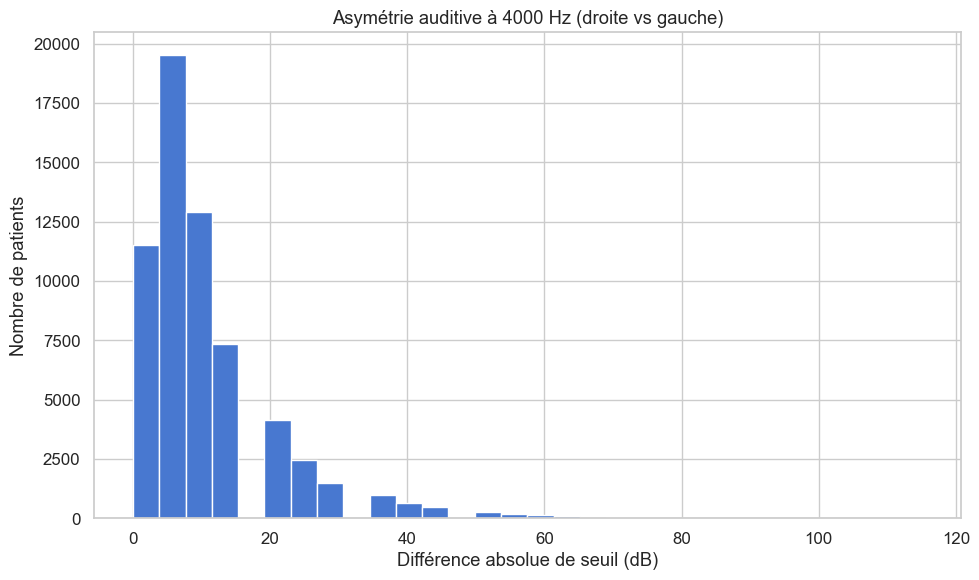

In [31]:
# Exemple sur 4000 Hz
df["ASYM_4000_THR"] = abs(df["FREQ_4000_D_THR"] - df["FREQ_4000_G_THR"])
df["ASYM_4000_THR"].hist(bins=30)
plt.title("Asymétrie auditive à 4000 Hz (droite vs gauche)")
plt.xlabel("Différence absolue de seuil (dB)")
plt.ylabel("Nombre de patients")
plt.tight_layout()
plt.show()

On constate que la majorité des patients présentent une faible asymétrie auditive entre l’oreille droite et gauche à 4000 Hz, avec une différence de seuil inférieure à 10 dB. Une asymétrie marquée (supérieure à 20 dB) est beaucoup plus rare, mais présente chez une minorité. Cette observation est transposable à chaque fréquence que ce soit pour THR ou UCL.

---
## Pourcentage de personnes testées ayant des accouphènes par tranche d'âge

In [32]:
resultats = []

# Boucle par tranche d'âge de 0 à 120 ans
for age_min in range(0, 121, 5):
    age_max = age_min + 5
    tranche = df[(df["AGE"] >= age_min) & (df["AGE"] < age_max)]
    total = len(tranche)
    acouphene = len(tranche[tranche["ACOUPHENES"] == 1])
    pourcentage = (acouphene / total * 100) if total > 0 else 0
    resultats.append({
        "Tranche d'âge": f"{age_min}-{age_max - 1}",
        "Pourcentage acouphènes": round(pourcentage, 2),
        "Nombre total": total
    })


df_resultats = pd.DataFrame(resultats)
display(df_resultats)

Tranche d'âge  Pourcentage acouphènes  Nombre total
0            0-4                   50.00            22
1            5-9                    0.00             8
2          10-14                   36.36            22
3          15-19                   50.00           102
4          20-24                   54.31           197
5          25-29                   52.69           279
6          30-34                   56.93           397
7          35-39                   55.93           565
8          40-44                   58.62           795
9          45-49                   59.77          1290
10         50-54                   57.55          2297
11         55-59                   58.32          3851
12         60-64                   55.56          5769
13         65-69                   51.15          9116
14         70-74                   47.88         11331
15         75-79                   42.91         10525
16         80-84                   39.04          7515
17         85-89                   35.22          5381
18         90-94                   28.55          2322
19         95-99                   24.89           454
20       100-104                   35.14            37
21       105-109                    0.00             0
22       110-114                    0.00             0
23       115-119                    0.00             0
24       120-124                    0.00             0

Le pourcentage de patients rapportant des acouphènes augmente progressivement à partir de l’adolescence, atteint un pic autour de 45-59 ans (~58 %), puis diminue avec l’âge avancé. Très peu de cas sont enregistrés avant 15 ans ou après 95 ans, en raison d’un faible effectif dans ces tranches. Cela nous montre bien que les jeunes qui vont se faire tester le font probablement car ils ressentent une douleur déjà, contrairement aux personnes agées qui elles le font plus au cas où.